In [1]:
import pandas as pd

DADOS = '../dados/Mall_Customers_without_CustomerID_Clustered.csv'

df_clustered = pd.read_csv(DADOS)
df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


In [2]:
import joblib

kmeans = joblib.load('../modelos/kmeans.pkl')

kmeans.labels_

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [3]:
kmeans.cluster_centers_

array([[56.15555556, 53.37777778, 49.08888889],
       [41.68571429, 88.22857143, 17.28571429],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [32.69230769, 86.53846154, 82.12820513],
       [44.14285714, 25.14285714, 19.52380952]])

In [12]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualizar_clusters(
        dataframe,
        colunas,
        quantidade_de_cores,
        mostrar_centroides=True,
        mostrar_pontos=False):

    # pegar as 5 primeiras cores da palette tab10
    cores = plt.cm.tab10.colors[:quantidade_de_cores]
    cores = ListedColormap(cores)

    # declarar a figura
    fig = plt.figure()

    ax = fig.add_subplot(111, projection='3d')

    # declarar os centroids e iterar entre cada um deles com enumerate
    centroids = kmeans.cluster_centers_

    # declarar o que é cada valor de variável
    x = dataframe[colunas[0]]
    y = dataframe[colunas[1]]
    z = dataframe[colunas[2]]
    
    # criar uma função para mostrar os centroides
    ligar_centroides = mostrar_centroides
    ligar_pontos = mostrar_pontos


    for i, centroid in enumerate(centroids):
        if ligar_centroides:
            # fazer o unpacking do array
            # argumento s=500 indica o tamanho do marcador
            # argumento alpha indica a opacidade
            ax.scatter(*centroid, s=500, alpha = 0.5)

            # adicionar o número de cada cluster
            # adicionar argumentos para deixar o número dentro do marcador e centralizado
            ax.text(*centroid, f'{i}', fontsize=20, horizontalalignment='center', verticalalignment='center')

        if ligar_pontos:
            # colocar os pontos de dispersão
            # formatar para deixar as cores iguais ao centróide
            s = ax.scatter(x, y, z, c = df_clustered['cluster'], cmap=cores)
            ax.legend(*s.legend_elements(), bbox_to_anchor=(1.1, 1), loc='upper left')

    ax.set_xlabel(colunas[0])
    ax.set_ylabel(colunas[1])
    ax.set_xlabel(colunas[2])
    
    # mostrar a figura
    plt.show()

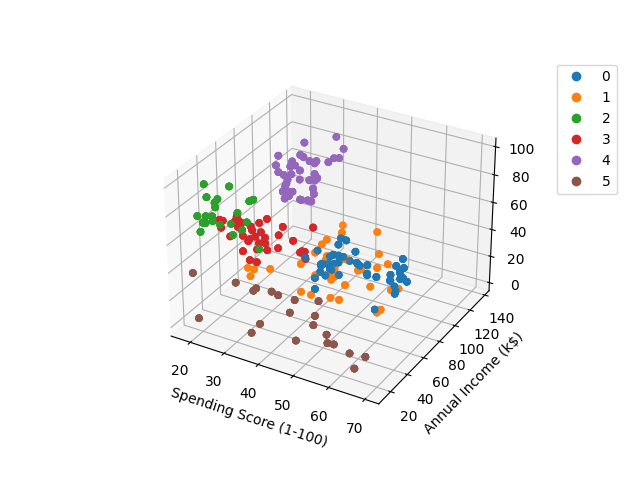

In [15]:
visualizar_clusters(df_clustered,
                    colunas = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
                    quantidade_de_cores=6,
                    mostrar_centroides=False,
                    mostrar_pontos=True)